In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split  #Splits a dataset into training and testing subsets
from sklearn.ensemble import RandomForestClassifier #A machine learning algorithm used for classification tasks
from sklearn.metrics import classification_report, accuracy_score #Generates a detailed report on the performance of a classification model.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #imports the Linear Discriminant Analysis (LDA) class 
import joblib #saving and loading machine learning models and other Python objects
from sklearn.metrics import confusion_matrix
import seaborn as sns # Python data visualization library based on matplotlib
import matplotlib.pyplot as plt


In [123]:

data = pd.read_csv('/Users/mariavivasarias/Desktop/labeled_objects_with_statistical_intensities.csv')


In [125]:
data['Valid_Tumor']= (data['Valid_Tumor']>0.5).astype(int)
data.head()

,Filename,Object_ID,Area,Perimeter,Circularity,Eccentricity,Solidity,Mean_Intensity,Std_Intensity,Max_Intensity,Min_Intensity,Valid_Tumor
0,benign (208) copia.png,0,9.0,9.207107,1.334154,0.929440,1.000000,0.006972,0.007572,0.019608,0.000000,0
1,benign (208) copia.png,1,16.0,12.621320,1.262177,0.668184,0.941176,0.051961,0.179047,0.745098,0.000000,0
2,benign (208) copia.png,2,9.0,9.207107,1.334154,0.929440,1.000000,0.208715,0.008627,0.227451,0.196078,0
3,benign (208) copia.png,3,44.0,27.071068,0.754487,0.940997,0.916667,0.226381,0.013849,0.274510,0.203922,0
4,benign (208) copia.png,4,7.0,7.207107,1.693503,0.888666,1.000000,0.256583,0.014195,0.274510,0.239216,0


In [127]:

features = ['Area', 'Perimeter', 'Circularity', 'Eccentricity', 'Solidity', 'Mean_Intensity', 'Std_Intensity', 'Max_Intensity', 'Min_Intensity']
target = 'Valid_Tumor'

X = data[features]  # Feature matrix
y = data[target]    # Target label

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy}')

# Print the classification report to evaluate the performance more deeply
print('Classification Report :')
print(classification_report(y_test, y_pred))


Accuracy : 0.9700854700854701
Classification Report :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       226
           1       0.67      0.25      0.36         8

    accuracy                           0.97       234
   macro avg       0.82      0.62      0.67       234
weighted avg       0.96      0.97      0.96       234



In [129]:

features = ['Area', 'Perimeter', 'Circularity', 'Eccentricity', 'Solidity', 'Mean_Intensity', 'Std_Intensity', 'Max_Intensity', 'Min_Intensity']
target = 'Valid_Tumor'

X = data[features]  # Feature matrix (9 features)
y = data[target]    # Target label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier
lda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9786324786324786
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       226
           1       0.64      0.88      0.74         8

    accuracy                           0.98       234
   macro avg       0.82      0.93      0.86       234
weighted avg       0.98      0.98      0.98       234



In [131]:
# Save the trained LDA model to a file
import pickle
with open('/Users/mariavivasarias/Desktop/lda_model_9_features.pkl', 'wb') as f:
    pickle.dump(lda, f)

print("LDA model with 9 features saved to lda_model_9_features.pkl")


LDA model with 9 features saved to lda_model_9_features.pkl


Confusion Matrix:
[[222   4]
 [  1   7]]


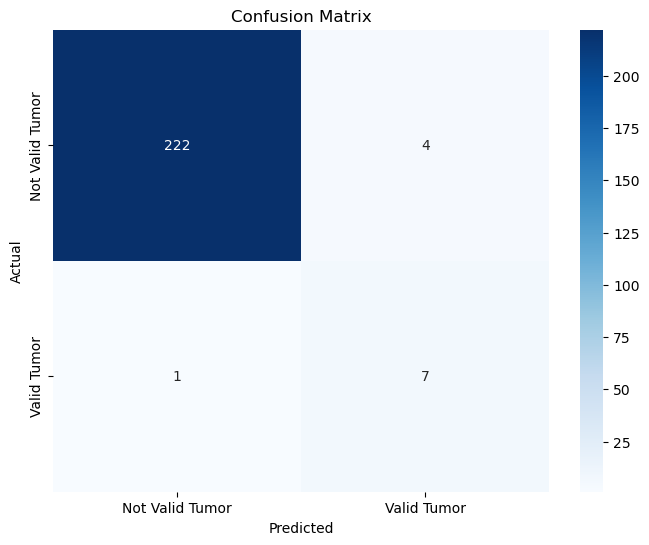

In [133]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Valid Tumor', 'Valid Tumor'], yticklabels=['Not Valid Tumor', 'Valid Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()